In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

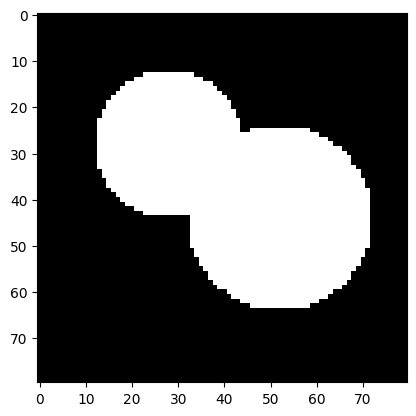

In [5]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

plt.imshow(image, cmap="gray")

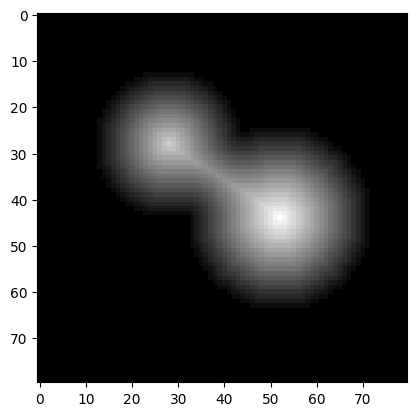

In [6]:
distance = ndi.distance_transform_edt(image)
plt.imshow(distance, cmap="gray")

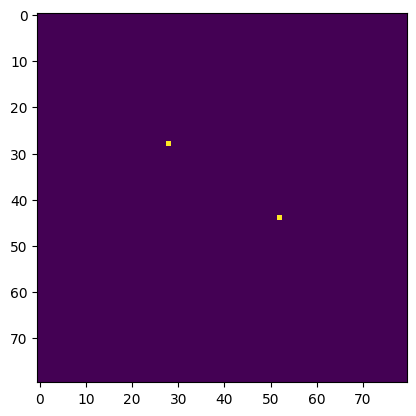

In [8]:
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
plt.imshow(mask)

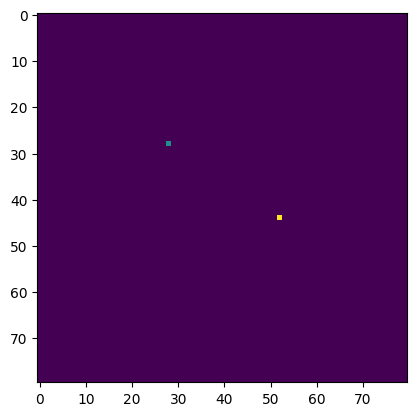

In [9]:
markers, _ = ndi.label(mask)
plt.imshow(markers)

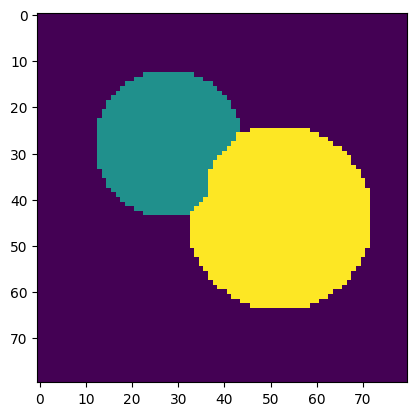

In [16]:
labels = watershed(-distance, markers, mask=image)
plt.imshow(labels)

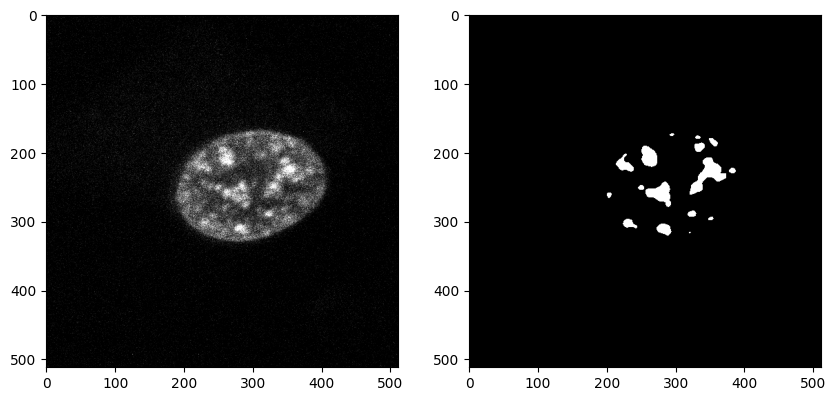

In [131]:
im = cv.imread("ex6.tif")
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
im_blur = cv.GaussianBlur(im_gray, (15,15) ,0)
ret, thresh = cv.threshold(im_blur, 130, 255, cv.THRESH_BINARY)

fig = plt.figure(figsize = (10,7))
fig.add_subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
fig.add_subplot(1, 2, 2)
plt.imshow(thresh, cmap="gray")

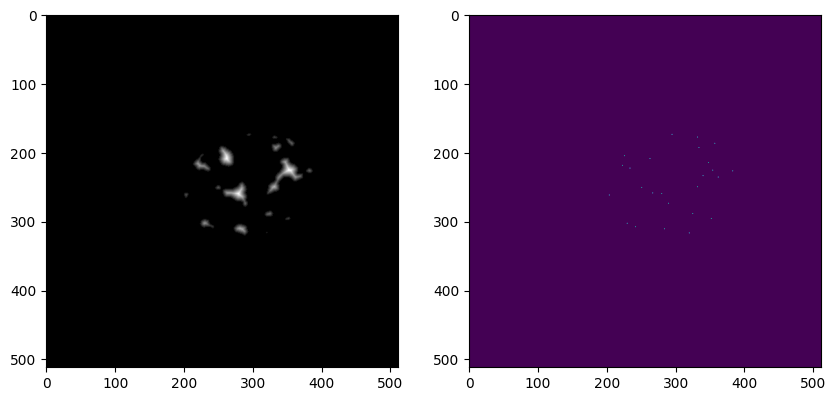

In [132]:
distance = ndi.distance_transform_edt(thresh)
coords = peak_local_max(distance, min_distance=10, footprint=np.ones((3, 3)), labels=thresh)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True

fig = plt.figure(figsize = (10,7))
fig.add_subplot(1, 2, 1)
plt.imshow(distance, cmap="gray")
fig.add_subplot(1, 2, 2)
plt.imshow(mask)

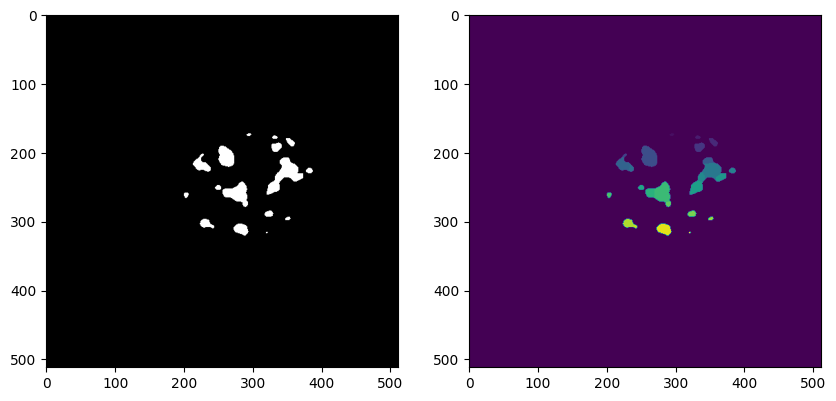

In [133]:
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=thresh)
fig = plt.figure(figsize = (10,7))
fig.add_subplot(1, 2, 1)
plt.imshow(thresh, cmap="gray")
fig.add_subplot(1, 2, 2)
plt.imshow(labels)

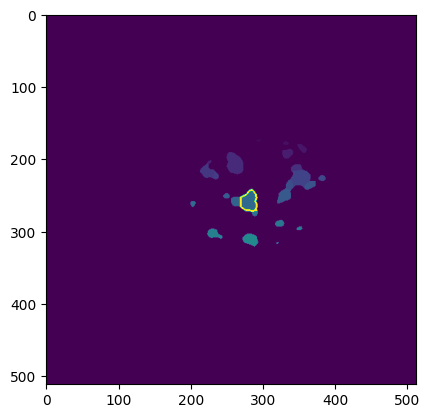

In [134]:
im_labels = labels.copy()
binary = np.zeros(labels.shape, dtype = "uint8")
binary[np.where(labels==17)] = 255
contour, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(im_labels, contour[0], -1, (50, 0, 0), 2, cv.LINE_8)
plt.imshow(im_labels)

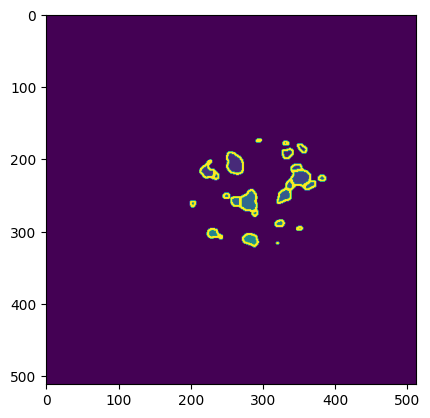

In [135]:
im_labels = labels.copy()
contours = []
for i in range(1, np.max(labels)+1):
    binary = np.zeros(labels.shape, dtype = "uint8")
    binary[np.where(labels==i)] = 255
    contour, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contours.append(contour[0])
cv.drawContours(im_labels, contours, -1, (50, 0, 0), 2, cv.LINE_8)
plt.imshow(im_labels)

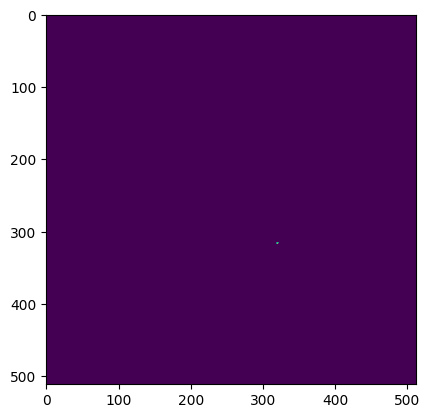

In [109]:
back = np.zeros(labels.shape)
cv.fillPoly(back, pts=[contours[24]], color=(255,255,255))
plt.imshow(back)